# Statement of the Problem 3: Accuracy of the SEIR-SEI model in forecasting dengue cases based on historical data

## PYTHON TOOLS NEEDED

In [53]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
import matplotlib.pyplot as plt

In [54]:
fc = pd.read_csv('SEIR-SEI.csv')
ad = pd.read_csv('2024-dengue-cases-cavite.csv')

In [55]:
def aggregate_daily_to_monthly(daily_data):
    """Converts a 365-Day daily array to a 12-item Dayly sum array."""
    # List of Days in each Day for a non-leap year
    Days_in_each_Day = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    
    data = []
    current_Day = 0
    for Days in Days_in_each_Day:
        # Sums the daily cases for the correct number of Days for each Day
        Day_sum = np.sum(daily_data[current_Day : current_Day + Days])
        data.append(Day_sum)
        current_Day += Days
        
    return np.array(data)

In [56]:
forecast = aggregate_daily_to_monthly(fc['Ih'])
actual_data = ad['Cases']

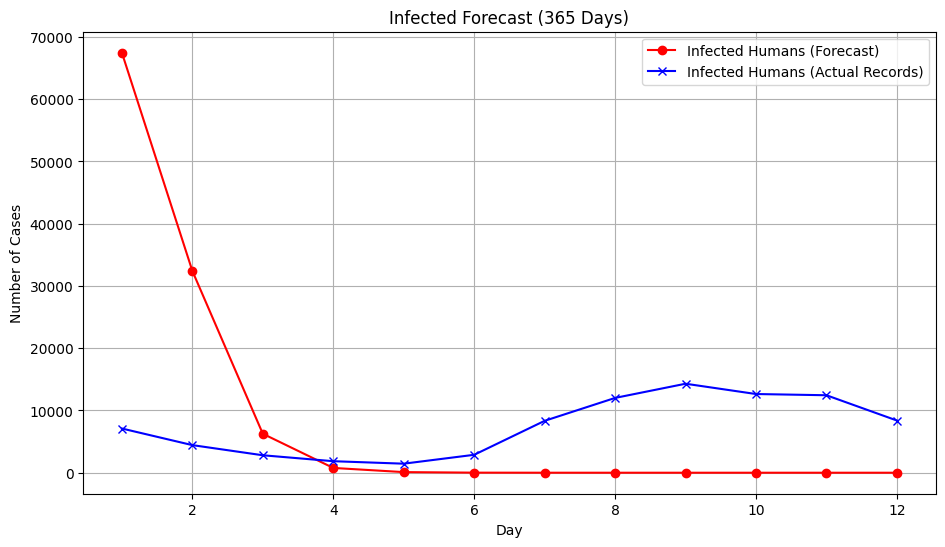

In [57]:
plt.figure(figsize=(11,6))
plt.plot(np.arange(1, 13), forecast, marker="o", linestyle='-', color='red', label='Infected Humans (Forecast)')
plt.plot(np.arange(1, 13), actual_data, marker="x", linestyle='-', color='blue', label='Infected Humans (Actual Records)')
plt.title("Infected Forecast (365 Days)")
plt.xlabel("Day")
plt.ylabel("Number of Cases")
plt.legend()
plt.grid(True)
plt.show()

In [58]:
# --- Calculation of Evaluation Metrics ---
# 1. Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_data, forecast)

# 2. Calculate Root Mean Squared Error (RMSE)
rmse = math.sqrt(mse)

# 3. Calculate R-squared (R²)
r2 = r2_score(actual_data, forecast)

# 4. Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_data, forecast)

# --- Display the results ---
print("Model Evaluation Metrics:")
print(f"  - RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"  - R-squared (R²): {r2:.2f}")
print(f"  - MAE (Mean Absolute Error): {mae:.2f}")

Model Evaluation Metrics:
  - RMSE (Root Mean Squared Error): 20924.32
  - R-squared (R²): -20.87
  - MAE (Mean Absolute Error): 13768.94
